In [1]:
import pandas as pd

# import data

df = pd.read_csv("C:\\Users\\Mohammad\\Desktop\\Graduate\\2\\Deep Learning\\Project\\pokemon_data.csv")

In [3]:
# getting the count of rows and columns in the dataframe

df.shape

(1025, 29)

In [5]:
# checking the data 
df.head(10).style.set_properties(**{'background-color': 'ivory',
                           'color': 'black'})

,dexnum,name,generation,type1,type2,species,height,weight,ability1,ability2,hidden_ability,hp,attack,defense,sp_atk,sp_def,speed,total,ev_yield,catch_rate,base_friendship,base_exp,growth_rate,egg_group1,egg_group2,percent_male,percent_female,egg_cycles,special_group
0,1,Bulbasaur,1,Grass,Poison,Seed Pokémon,0.700000,6.900000,Overgrow,Chlorophyll,nan,45,49,49,65,65,45,318,1 Sp. Atk,45,50,64,Medium Slow,Grass,Monster,87.500000,12.500000,20,Ordinary
1,2,Ivysaur,1,Grass,Poison,Seed Pokémon,1.000000,13.000000,Overgrow,Chlorophyll,nan,60,62,63,80,80,60,405,"1 Sp. Atk, 1 Sp. Def",45,50,142,Medium Slow,Grass,Monster,87.500000,12.500000,20,Ordinary
2,3,Venusaur,1,Grass,Poison,Seed Pokémon,2.000000,100.000000,Overgrow,Chlorophyll,nan,80,82,83,100,100,80,525,"2 Sp. Atk, 1 Sp. Def",45,50,236,Medium Slow,Grass,Monster,87.500000,12.500000,20,Ordinary
3,4,Charmander,1,Fire,nan,Lizard Pokémon,0.600000,8.500000,Blaze,Solar Power,nan,39,52,43,60,50,65,309,1 Speed,45,50,62,Medium Slow,Dragon,Monster,87.500000,12.500000,20,Ordinary
4,5,Charmeleon,1,Fire,nan,Flame Pokémon,1.100000,19.000000,Blaze,Solar Power,nan,58,64,58,80,65,80,405,"1 Sp. Atk, 1 Speed",45,50,142,Medium Slow,Dragon,Monster,87.500000,12.500000,20,Ordinary
5,6,Charizard,1,Fire,Flying,Flame Pokémon,1.700000,90.500000,Blaze,Solar Power,nan,78,84,78,109,85,100,534,3 Sp. Atk,45,50,267,Medium Slow,Dragon,Monster,87.500000,12.500000,20,Ordinary
6,7,Squirtle,1,Water,nan,Tiny Turtle Pokémon,0.500000,9.000000,Torrent,Rain Dish,nan,44,48,65,50,64,43,314,1 Defense,45,50,63,Medium Slow,Monster,Water 1,87.500000,12.500000,20,Ordinary
7,8,Wartortle,1,Water,nan,Turtle Pokémon,1.000000,22.500000,Torrent,Rain Dish,nan,59,63,80,65,80,58,405,"1 Defense, 1 Sp. Def",45,50,142,Medium Slow,Monster,Water 1,87.500000,12.500000,20,Ordinary
8,9,Blastoise,1,Water,nan,Shellfish Pokémon,1.600000,85.500000,Torrent,Rain Dish,nan,79,83,100,85,105,78,530,3 Sp. Def,45,50,239,Medium Slow,Monster,Water 1,87.500000,12.500000,20,Ordinary
9,10,Caterpie,1,Bug,nan,Worm Pokémon,0.300000,2.900000,Shield Dust,Run Away,nan,45,30,35,20,20,45,195,1 HP,255,50,39,Medium Fast,Bug,nan,50.000000,50.000000,15,Ordinary


In [7]:
# list of columns

pd.DataFrame(df.columns,columns=['column name'])

,column name
0,dexnum
1,name
2,generation
3,type1
4,type2
5,species
6,height
7,weight
8,ability1
9,ability2


In [9]:
column='dexnum'
df=df.drop(column, axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 28 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             1025 non-null   object 
 1   generation       1025 non-null   int64  
 2   type1            1025 non-null   object 
 3   type2            526 non-null    object 
 4   species          1025 non-null   object 
 5   height           1025 non-null   float64
 6   weight           1025 non-null   float64
 7   ability1         1025 non-null   object 
 8   ability2         858 non-null    object 
 9   hidden_ability   530 non-null    object 
 10  hp               1025 non-null   int64  
 11  attack           1025 non-null   int64  
 12  defense          1025 non-null   int64  
 13  sp_atk           1025 non-null   int64  
 14  sp_def           1025 non-null   int64  
 15  speed            1025 non-null   int64  
 16  total            1025 non-null   int64  
 17  ev_yield      

In [11]:
# Handling missing values

df['type2']=df['type2'].fillna('No type2')
df['ability2']=df['ability2'].fillna('No ability2')
df['hidden_ability']=df['hidden_ability'].fillna('No hidden ability')
df['egg_group2']=df['egg_group2'].fillna('No egg group2')
df['percent_male']=df['percent_male'].fillna(0)
df['percent_female']=df['percent_female'].fillna(0)

In [13]:
df['genderless']=100-df['percent_male']-df['percent_female']

In [15]:
df.replace(['—'], pd.NA, inplace=True)

In [17]:
df=df.dropna()
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1008 entries, 0 to 1007
Data columns (total 29 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             1008 non-null   object 
 1   generation       1008 non-null   int64  
 2   type1            1008 non-null   object 
 3   type2            1008 non-null   object 
 4   species          1008 non-null   object 
 5   height           1008 non-null   float64
 6   weight           1008 non-null   float64
 7   ability1         1008 non-null   object 
 8   ability2         1008 non-null   object 
 9   hidden_ability   1008 non-null   object 
 10  hp               1008 non-null   int64  
 11  attack           1008 non-null   int64  
 12  defense          1008 non-null   int64  
 13  sp_atk           1008 non-null   int64  
 14  sp_def           1008 non-null   int64  
 15  speed            1008 non-null   int64  
 16  total            1008 non-null   int64  
 17  ev_yield         10

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

# Set the style for seaborn
sns.set(style="whitegrid")

C:\Users\Mohammad\AppData\Local\Temp\ipykernel_5620\2986832486.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='generation', data=df, palette='viridis')


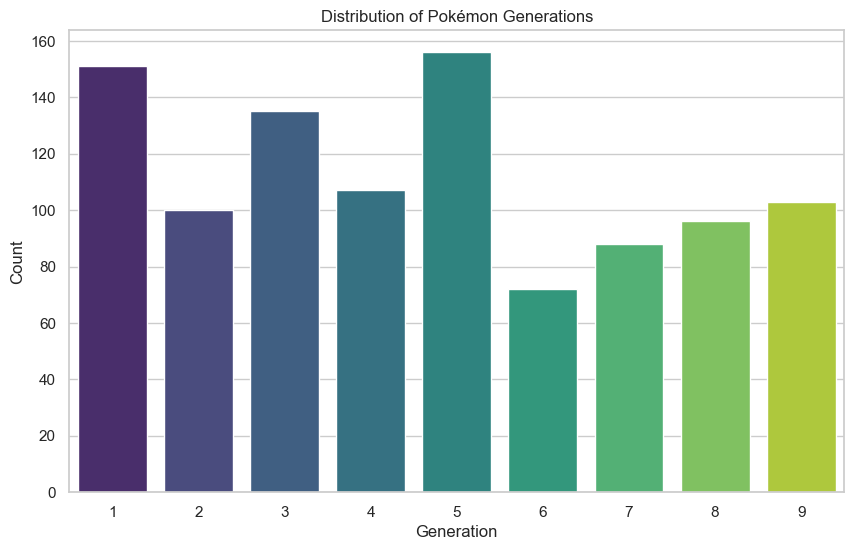

In [272]:
# Visualization 1: Distribution of Pokémon Generations
plt.figure(figsize=(10, 6))
sns.countplot(x='generation', data=df, palette='viridis')
plt.title('Distribution of Pokémon Generations')
plt.xlabel('Generation')
plt.ylabel('Count')
plt.show()

C:\Users\Mohammad\AppData\Local\Temp\ipykernel_5620\209294466.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=type_counts.index, y=type_counts.values, palette='viridis')


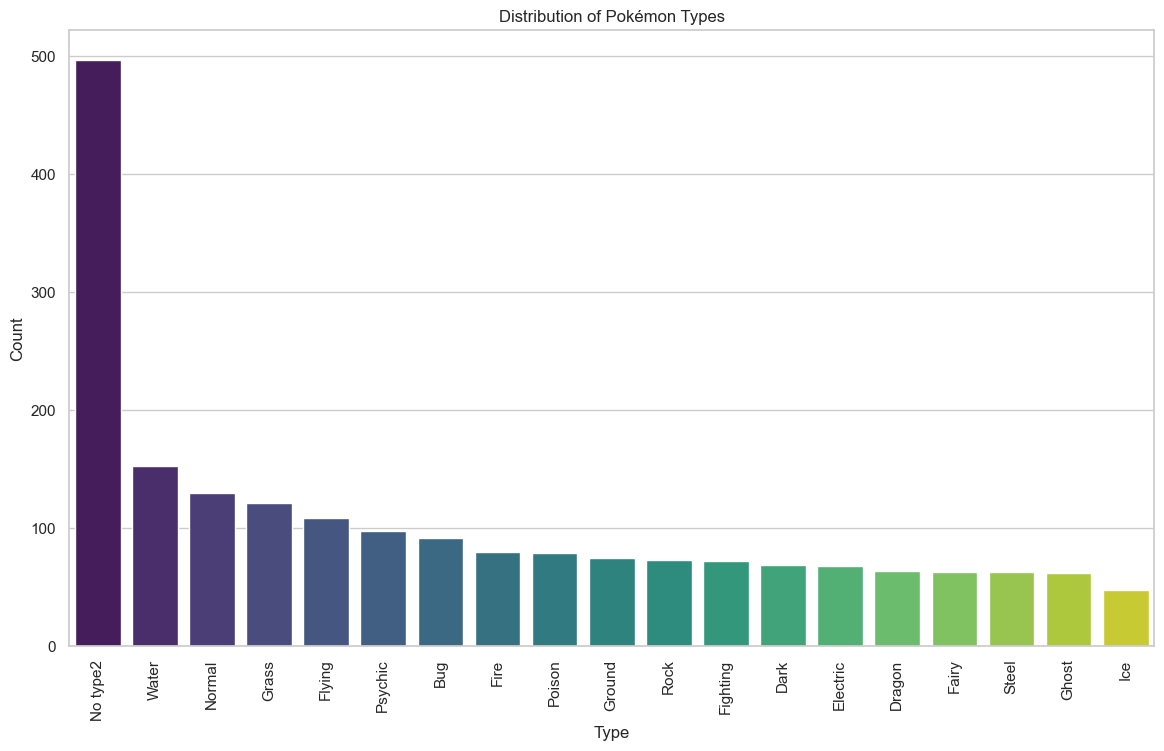

In [274]:
# Visualization 2: Distribution of Pokémon Types
plt.figure(figsize=(14, 8))
type_counts = pd.concat([df['type1'], df['type2']]).value_counts()
sns.barplot(x=type_counts.index, y=type_counts.values, palette='viridis')
plt.title('Distribution of Pokémon Types')
plt.xlabel('Type')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()

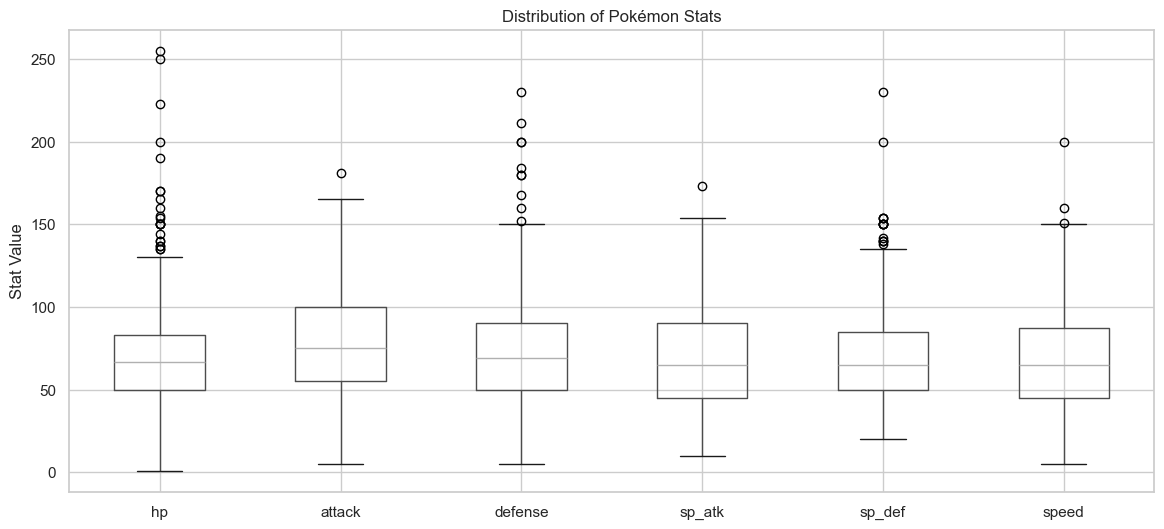

In [276]:
# Visualization 3: Pokémon Stats Distribution
plt.figure(figsize=(14, 6))
stats = ['hp', 'attack', 'defense', 'sp_atk', 'sp_def', 'speed']
df[stats].boxplot()
plt.title('Distribution of Pokémon Stats')
plt.ylabel('Stat Value')
plt.show()

C:\Users\Mohammad\AppData\Local\Temp\ipykernel_5620\1728141567.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='generation', y='total', data=df, palette='viridis')


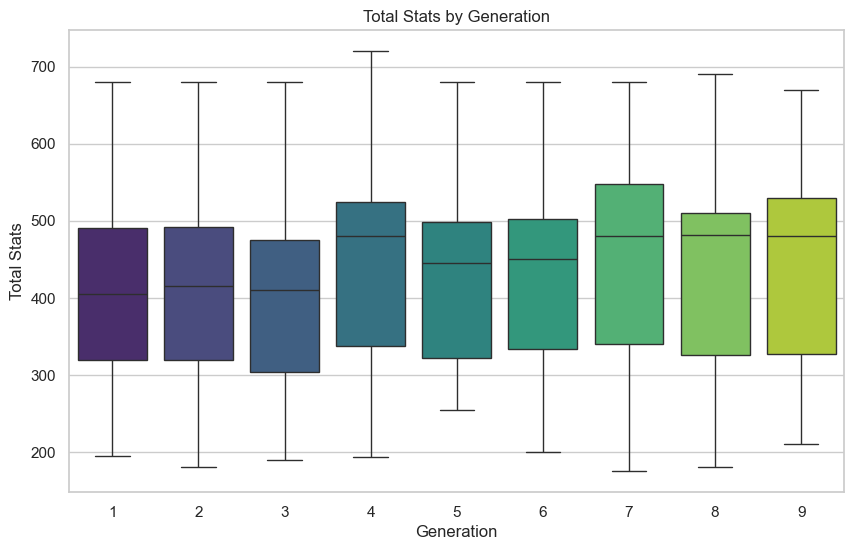

In [278]:
# Visualization 4: Total Stats by Generation
plt.figure(figsize=(10, 6))
sns.boxplot(x='generation', y='total', data=df, palette='viridis')
plt.title('Total Stats by Generation')
plt.xlabel('Generation')
plt.ylabel('Total Stats')
plt.show()

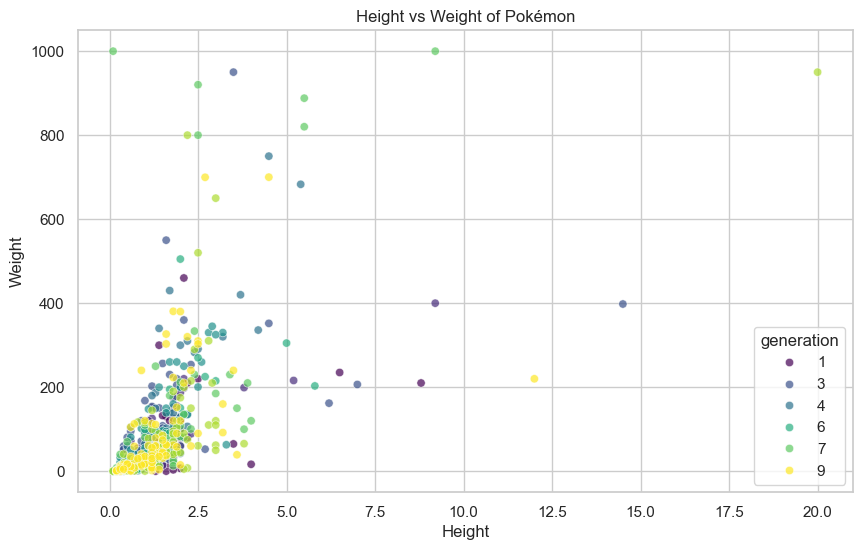

In [280]:
# Visualization 5: Height vs Weight
plt.figure(figsize=(10, 6))
sns.scatterplot(x='height', y='weight', data=df, hue='generation', palette='viridis', alpha=0.7)
plt.title('Height vs Weight of Pokémon')
plt.xlabel('Height')
plt.ylabel('Weight')
plt.show()

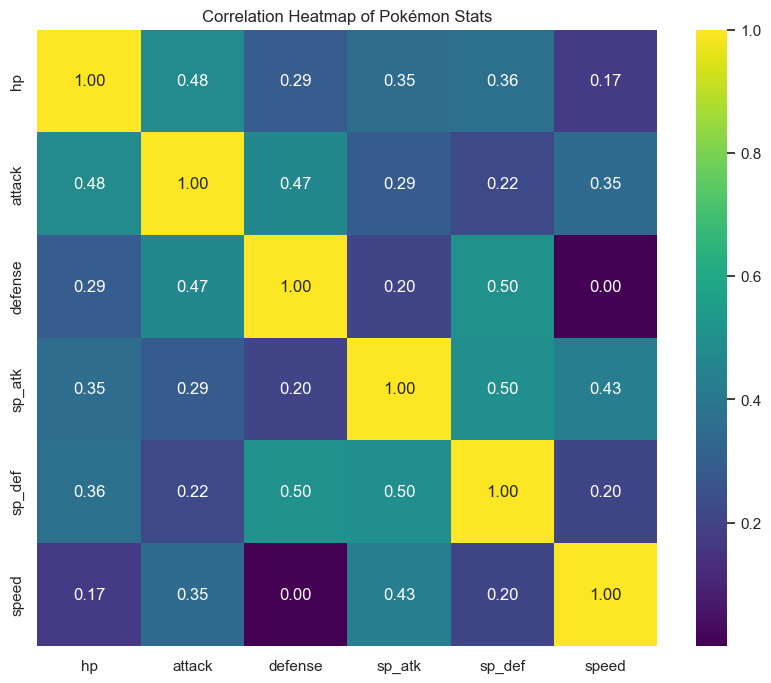

In [282]:
# Visualization 6: Correlation Heatmap of Stats
plt.figure(figsize=(10, 8))
corr = df[stats].corr()
sns.heatmap(corr, annot=True, cmap='viridis', fmt='.2f')
plt.title('Correlation Heatmap of Pokémon Stats')
plt.show()

C:\Users\Mohammad\AppData\Local\Temp\ipykernel_5620\1223789594.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='type1', y='speed', data=df, palette='viridis')


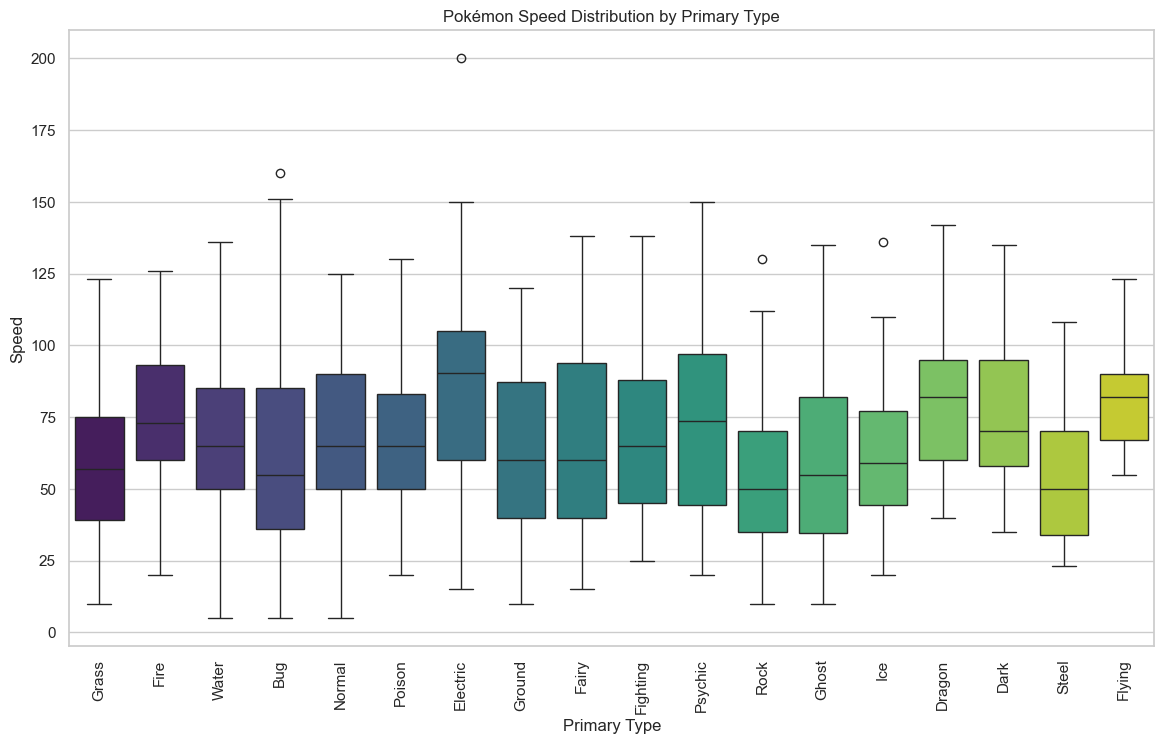

In [284]:
# Visualization 7: Pokémon Speed Distribution by Type1
plt.figure(figsize=(14, 8))
sns.boxplot(x='type1', y='speed', data=df, palette='viridis')
plt.title('Pokémon Speed Distribution by Primary Type')
plt.xlabel('Primary Type')
plt.ylabel('Speed')
plt.xticks(rotation=90)
plt.show()

C:\Users\Mohammad\AppData\Local\Temp\ipykernel_5620\2714656852.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='generation', y='base_exp', data=df, palette='viridis')


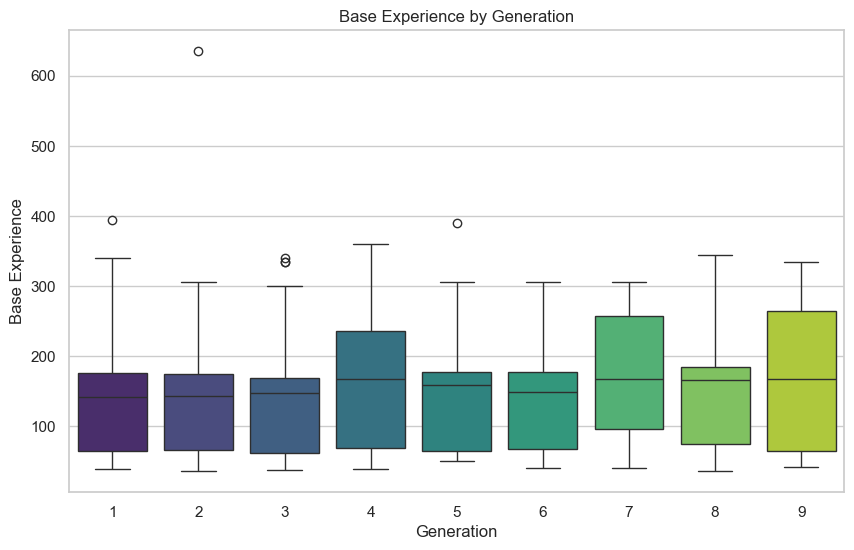

In [286]:
# Visualization 8: Base Experience by Generation
plt.figure(figsize=(10, 6))
df['base_exp'] = pd.to_numeric(df['base_exp'], errors='coerce')
sns.boxplot(x='generation', y='base_exp', data=df, palette='viridis')
plt.title('Base Experience by Generation')
plt.xlabel('Generation')
plt.ylabel('Base Experience')
plt.show()

C:\Users\Mohammad\AppData\Local\Temp\ipykernel_5620\1026250334.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=hidden_ability_counts.index, y=hidden_ability_counts.values, palette='viridis')


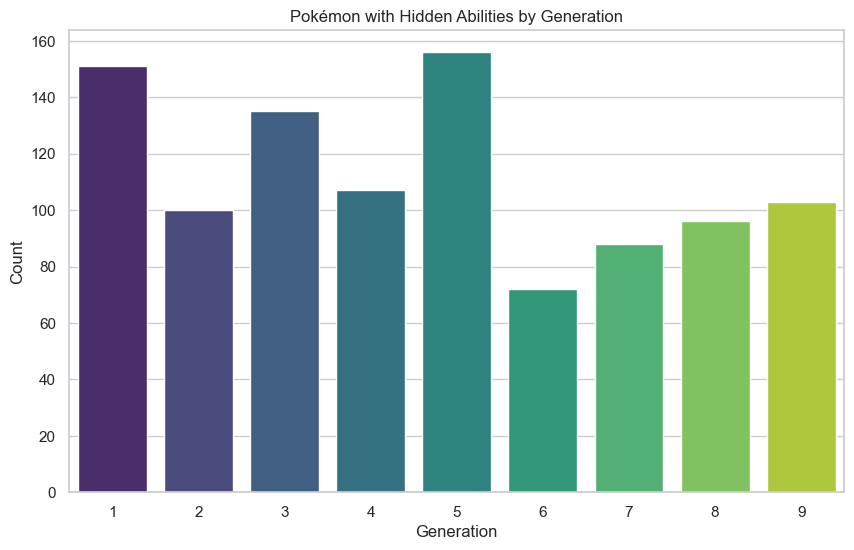

In [288]:
# Visualization 9: Pokémon with Hidden Abilities by Generation
plt.figure(figsize=(10, 6))
hidden_ability_counts = df[df['hidden_ability'].notna()]['generation'].value_counts()
sns.barplot(x=hidden_ability_counts.index, y=hidden_ability_counts.values, palette='viridis')
plt.title('Pokémon with Hidden Abilities by Generation')
plt.xlabel('Generation')
plt.ylabel('Count')
plt.show()

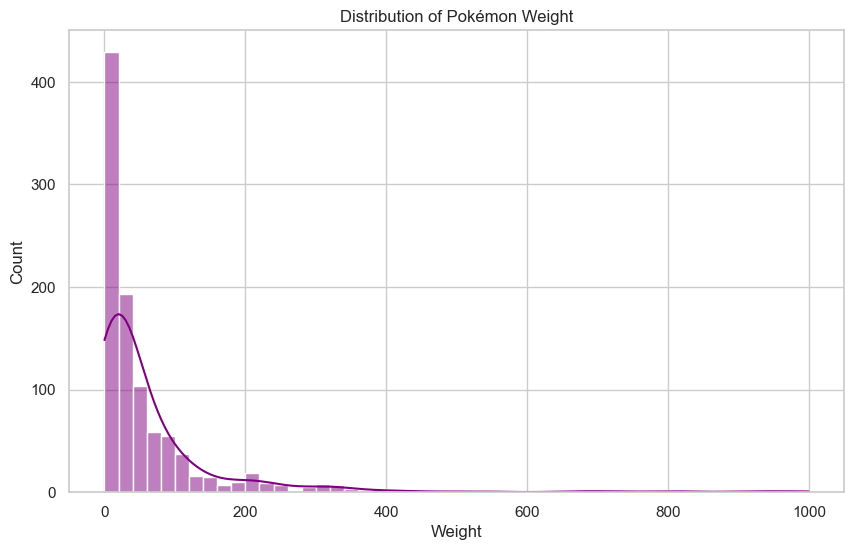

In [290]:
# Visualization 10: Pokémon Weight Distribution
plt.figure(figsize=(10, 6))
sns.histplot(df['weight'], bins=50, kde=True, color='purple')
plt.title('Distribution of Pokémon Weight')
plt.xlabel('Weight')
plt.ylabel('Count')
plt.show()

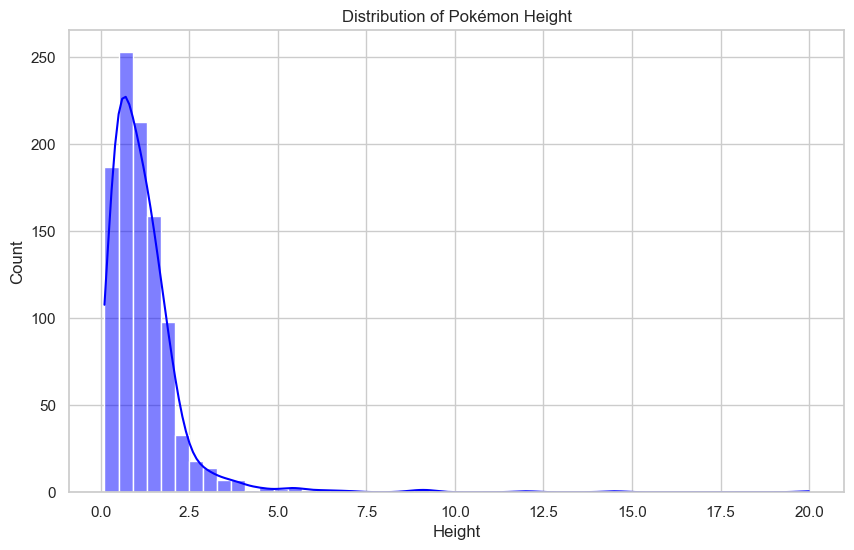

In [292]:
# Visualization 11: Pokémon Height Distribution
plt.figure(figsize=(10, 6))
sns.histplot(df['height'], bins=50, kde=True, color='blue')
plt.title('Distribution of Pokémon Height')
plt.xlabel('Height')
plt.ylabel('Count')
plt.show()

C:\Users\Mohammad\AppData\Local\Temp\ipykernel_5620\2508775924.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='type1', y='total', data=df, palette='viridis')


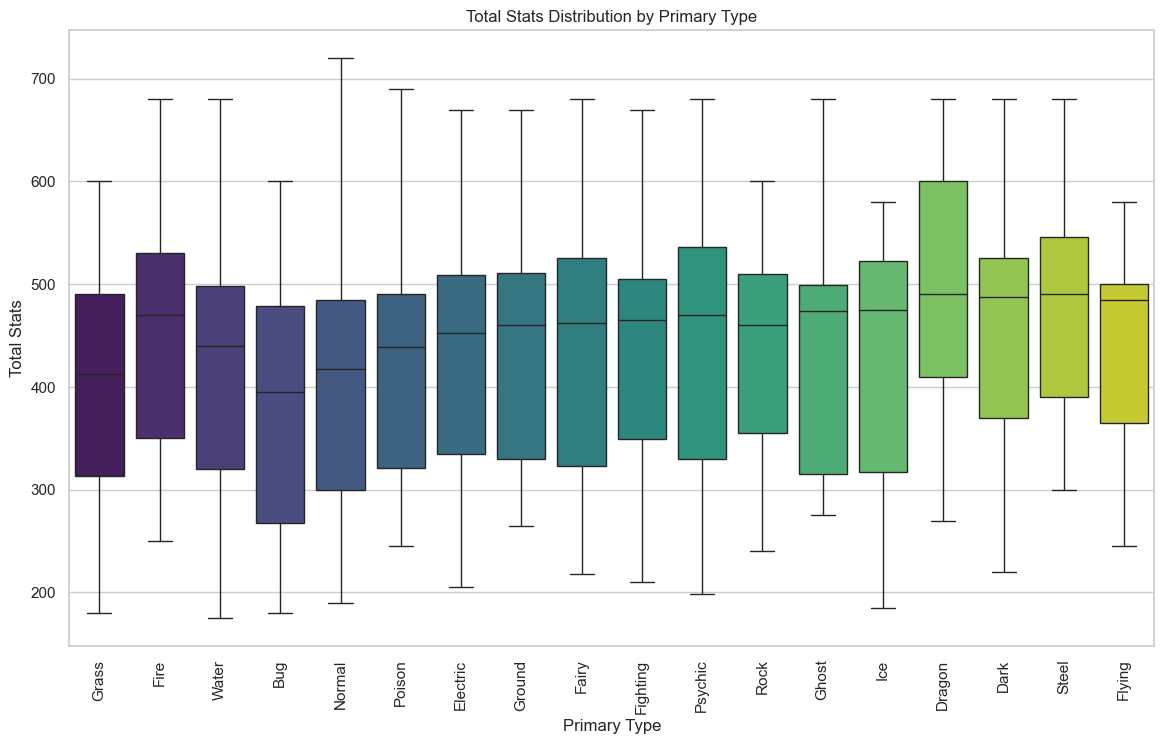

In [296]:
# Visualization 12: Pokémon Total Stats by Type1
plt.figure(figsize=(14, 8))
sns.boxplot(x='type1', y='total', data=df, palette='viridis')
plt.title('Total Stats Distribution by Primary Type')
plt.xlabel('Primary Type')
plt.ylabel('Total Stats')
plt.xticks(rotation=90)
plt.show()

In [19]:
from scipy.stats.mstats import winsorize
import numpy as np
from scipy import stats

# Separate the dependent variable 'generation'
df2=df
generation = df2['generation']
df2 = df2.drop(columns=['generation'])
df2 = df2.drop(columns=['name'])

# Winsorization parameters
lower_percentile = 0.05
upper_percentile = 0.95
# Winsorize each column
# Select numeric columns
numeric_cols = df2.select_dtypes(include=[np.number])

# Function to detect outliers using Z-score
def identify_outliers_zscore(df2, threshold=3):
    z_scores = np.abs(stats.zscore(df2.select_dtypes(include=[np.number])))
    return (z_scores > threshold)

# Identify outliers
outliers = identify_outliers_zscore(df2)

# Display the outliers
print("Outliers detected:\n", df2[outliers.any(axis=1)])

# Winsorization parameters
lower_percentile = 0.05
upper_percentile = 0.95

# Apply Winsorization only to columns with outliers
numeric_cols = df2.select_dtypes(include=[np.number])
winsorized_numeric_cols = numeric_cols.apply(
    lambda x: winsorize(x, limits=(lower_percentile, 1 - upper_percentile)) if identify_outliers_zscore(x.to_frame()).any().any() else x
)

# Combine Winsorized numeric columns with non-numeric columns
df_winsorized = df2.copy()
df_winsorized[numeric_cols.columns] = winsorized_numeric_cols

# Display the results
print("\nOriginal DataFrame:\n", df2)
print("\nWinsorized DataFrame:\n", df_winsorized)

Outliers detected:
          type1     type2              species  height  weight        ability1  \
90       Water       Ice      Bivalve Pokémon     1.5   132.5     Shell Armor   
94        Rock    Ground   Rock Snake Pokémon     8.8   210.0       Rock Head   
112     Normal  No type2          Egg Pokémon     1.1    34.6    Natural Cure   
129      Water    Flying    Atrocious Pokémon     6.5   235.0      Intimidate   
142     Normal  No type2     Sleeping Pokémon     2.1   460.0        Immunity   
201    Psychic  No type2      Patient Pokémon     1.3    28.5      Shadow Tag   
207      Steel    Ground   Iron Snake Pokémon     9.2   400.0       Rock Head   
212        Bug      Rock         Mold Pokémon     0.6    20.5          Sturdy   
241     Normal  No type2    Happiness Pokémon     1.5    46.8    Natural Cure   
248    Psychic    Flying       Diving Pokémon     5.2   216.0        Pressure   
249       Fire    Flying      Rainbow Pokémon     3.8   199.0        Pressure   
288     

In [21]:
# Encode categorical features using one-hot encoding
categorical_columns = df_winsorized.select_dtypes(include=['object']).columns

one_hot = pd.get_dummies(df_winsorized[categorical_columns], dtype='int', drop_first=True)

df3 = df_winsorized.drop(categorical_columns,axis = 1)
# Join the encoded df
df3 = df3.join(one_hot)
df3.shape

(1008, 1554)

In [27]:
# Scale numeric features

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
numeric_columns = df3.select_dtypes(include=['int', 'float']).columns

df3[numeric_columns] = df3[numeric_columns].apply(pd.to_numeric, errors='coerce')
df3[numeric_columns] = scaler.fit_transform(df3[numeric_columns])
df3.shape

(1008, 1554)

In [29]:
df3.head(10)

,height,weight,hp,attack,defense,sp_atk,sp_def,speed,total,catch_rate,...,egg_cycles_5,egg_cycles_50,egg_cycles_80,special_group_Baby Pokemon,special_group_Fossil,special_group_Future Paradox,special_group_Legendary,special_group_Mythical,special_group_Ordinary,special_group_Ultra Beast
0,0.166667,0.022025,0.131579,0.19,0.155556,0.368421,0.382022,0.222222,0.262385,0.166667,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.291667,0.045595,0.328947,0.32,0.311111,0.526316,0.550562,0.388889,0.422018,0.166667,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.708333,0.381762,0.592105,0.52,0.533333,0.736842,0.775281,0.611111,0.642202,0.166667,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.125000,0.028207,0.052632,0.22,0.088889,0.315789,0.213483,0.444444,0.245872,0.166667,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.333333,0.068779,0.302632,0.34,0.255556,0.526316,0.382022,0.611111,0.422018,0.166667,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
5,0.583333,0.345054,0.565789,0.54,0.477778,0.831579,0.606742,0.833333,0.658716,0.166667,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
6,0.083333,0.030139,0.118421,0.18,0.333333,0.210526,0.370787,0.200000,0.255046,0.166667,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
7,0.291667,0.082303,0.315789,0.33,0.500000,0.368421,0.550562,0.366667,0.422018,0.166667,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
8,0.541667,0.325734,0.578947,0.53,0.722222,0.578947,0.831461,0.588889,0.651376,0.166667,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
9,0.000000,0.006569,0.131579,0.00,0.000000,0.000000,0.000000,0.222222,0.036697,1.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [31]:
df3.shape

(1008, 1554)

In [33]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical

In [51]:
# Check correlations with the dependent variable
correlations = df3.corrwith(generation).abs().sort_values(ascending=False)
print(correlations.head(35))  # Print top 35 correlations

egg_cycles_50                       0.249244
species_Paradox Pokémon             0.211912
ability2_No ability2                0.200865
base_exp_285                        0.200732
genderless                          0.143627
hidden_ability_No hidden ability    0.143042
egg_group1_Undiscovered             0.141823
type2_Normal                        0.139907
ability1_Protosynthesis             0.139535
special_group_Future Paradox        0.139535
ability1_Quark Drive                0.139535
base_exp_265                        0.131114
attack                              0.128675
type2_Ghost                         0.127661
type2_Flying                        0.123993
ability1_Rock Head                  0.122257
percent_male                        0.121922
total                               0.121852
hp                                  0.117853
ev_yield_3 Attack                   0.116418
base_friendship_35                  0.116345
egg_group2_Mineral                  0.115815
special_gr

In [197]:
# Select top features based on correlation
top_features = correlations.head(600).index.tolist()
df_selected = df3[top_features]

In [55]:
# Splitting the dataset into train, validation, and test sets (80%, 10%, 10%)
X_train_val, X_test, y_train_val, y_test = train_test_split(df_selected, generation, test_size=0.1, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.1/0.9, random_state=42)

In [57]:
# Apply PCA if necessary
pca = PCA(n_components=0.95)  # Preserve 95% of the variance
X_train = pca.fit_transform(X_train)
X_val = pca.transform(X_val)
X_test = pca.transform(X_test)

In [95]:
# Function to evaluate model
def evaluate_model(model, X_val, y_val):
    y_pred = model.predict(X_val)
    accuracy = accuracy_score(y_val, y_pred)
    precision = precision_score(y_val, y_pred, average='weighted')
    recall = recall_score(y_val, y_pred, average='weighted')
    f1 = f1_score(y_val, y_pred, average='weighted')
    return accuracy, precision, recall, f1

In [279]:
from random import randrange
# 505
top_features = correlations.head(505).index.tolist()
df_selected = df3[top_features]
# Random Forest Model
rf_results = []
for i in range(10):
    # top_features = correlations.head(400).index.tolist()
    # df_selected = df3[top_features]
    seed=randrange(40,100)
    # Splitting the dataset into train, validation, and test sets (80%, 10%, 10%)
    X_train_val, X_test, y_train_val, y_test = train_test_split(df_selected, generation, test_size=0.1, random_state=seed)
    X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.1/0.9, random_state=seed)
    pca = PCA(n_components=0.95)  # Preserve 95% of the variance
    X_train = pca.fit_transform(X_train)
    X_val = pca.transform(X_val)
    X_test = pca.transform(X_test)
    rf = RandomForestClassifier(random_state=seed)
    rf.fit(X_train, y_train)
    results = evaluate_model(rf, X_val, y_val)
    rf_results.append(results)
rf_mean_results = np.mean(rf_results, axis=0)
print("Random Forest - Accuracy: {:.4f}, Precision: {:.4f}, Recall: {:.4f}, F1-score: {:.4f}".format(*rf_mean_results))


C:\Users\Mohammad\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Mohammad\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Random Forest - Accuracy: 0.5297, Precision: 0.5797, Recall: 0.5297, F1-score: 0.5191


In [135]:
# XGBoost Model

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

xgb_results = []
for i in range(10):
    seed=randrange(100)
    # Splitting the dataset into train, validation, and test sets (80%, 10%, 10%)
    X_train_val, X_test, y_train_val, y_test = train_test_split(df_selected, generation, test_size=0.1, random_state=seed)
    X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.1/0.9, random_state=seed)
    pca = PCA(n_components=0.95)  # Preserve 95% of the variance
    X_train = pca.fit_transform(X_train)
    X_val = pca.transform(X_val)
    X_test = pca.transform(X_test)
    y_train = le.fit_transform(y_train)
    xgb = XGBClassifier(random_state=seed, use_label_encoder=False, eval_metric='mlogloss')
    xgb.fit(X_train, y_train)
    results = evaluate_model(xgb, X_val, y_val)
    xgb_results.append(results)
xgb_mean_results = np.mean(xgb_results, axis=0)
print("XGBoost - Accuracy: {:.4f}, Precision: {:.4f}, Recall: {:.4f}, F1-score: {:.4f}".format(*xgb_mean_results))


C:\Users\Mohammad\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Mohammad\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Mohammad\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Mohammad\anaconda3\Lib\site-pa

XGBoost - Accuracy: 0.0594, Precision: 0.0692, Recall: 0.0594, F1-score: 0.0565


C:\Users\Mohammad\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Mohammad\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [289]:
# Multilayer Perceptron Model
mlp_results = []
for i in range(10):
    seed=randrange(43)
    # Splitting the dataset into train, validation, and test sets (80%, 10%, 10%)
    X_train_val, X_test, y_train_val, y_test = train_test_split(df_selected, generation, test_size=0.1, random_state=seed)
    X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.1/0.9, random_state=seed)
    pca = PCA(n_components=0.95)  # Preserve 95% of the variance
    X_train = pca.fit_transform(X_train)
    X_val = pca.transform(X_val)
    X_test = pca.transform(X_test)
    # Convert target variable to categorical for MLP
    y_train_cat = to_categorical(y_train - 1)
    y_val_cat = to_categorical(y_val - 1)
    y_test_cat = to_categorical(y_test - 1)
    tf.random.set_seed(seed)
    model = Sequential([
        Dense(512, activation='relu', input_shape=(X_train.shape[1],)),
        Dense(256, activation='relu'),
        Dense(128, activation='relu'),
        Dense(64, activation='relu'),
        Dense(32, activation='relu'),
        Dense(9, activation='softmax')
    ])
    model.compile(optimizer='adamW', loss='categorical_crossentropy', metrics=['accuracy'])
    model.fit(X_train, y_train_cat, epochs=50, batch_size=64, validation_data=(X_val, y_val_cat), verbose=0)
    loss, accuracy = model.evaluate(X_val, y_val_cat, verbose=0)
    y_pred = np.argmax(model.predict(X_val), axis=1)
    precision = precision_score(y_val, y_pred, average='weighted')
    recall = recall_score(y_val, y_pred, average='weighted')
    f1 = f1_score(y_val, y_pred, average='weighted')
    mlp_results.append((accuracy, precision, recall, f1))
mlp_mean_results = np.mean(mlp_results, axis=0)
print("MLP - Accuracy: {:.4f}, Precision: {:.4f}, Recall: {:.4f}, F1-score: {:.4f}".format(*mlp_mean_results))

C:\Users\Mohammad\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step


C:\Users\Mohammad\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Mohammad\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Mohammad\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step


C:\Users\Mohammad\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Mohammad\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Mohammad\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step


C:\Users\Mohammad\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Mohammad\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Mohammad\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step


C:\Users\Mohammad\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Mohammad\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Mohammad\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step


C:\Users\Mohammad\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Mohammad\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Mohammad\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step


C:\Users\Mohammad\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Mohammad\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Mohammad\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step


C:\Users\Mohammad\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Mohammad\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Mohammad\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step


C:\Users\Mohammad\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Mohammad\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Mohammad\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step


C:\Users\Mohammad\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Mohammad\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Mohammad\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
MLP - Accuracy: 0.5564, Precision: 0.0868, Recall: 0.0733, F1-score: 0.0738


C:\Users\Mohammad\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Mohammad\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [311]:
from sklearn.svm import SVC
# 505
top_features = correlations.head(1554).index.tolist()
df_selected = df3[top_features]
# SVM Model
svm_results = []
for i in range(10):
    seed=randrange(40,100)
    X_train_val, X_test, y_train_val, y_test = train_test_split(df_selected, generation, test_size=0.1, random_state=seed)
    X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.1/0.9, random_state=seed)
    pca = PCA(n_components=0.95)  # Preserve 95% of the variance
    X_train = pca.fit_transform(X_train)
    X_val = pca.transform(X_val)
    X_test = pca.transform(X_test)
    svm = SVC(random_state=seed)
    svm.fit(X_train, y_train)
    results = evaluate_model(svm, X_val, y_val)
    svm_results.append(results)
svm_mean_results = np.mean(svm_results, axis=0)
print("SVM - Accuracy: {:.4f}, Precision: {:.4f}, Recall: {:.4f}, F1-score: {:.4f}".format(*svm_mean_results))

SVM - Accuracy: 0.5059, Precision: 0.6078, Recall: 0.5059, F1-score: 0.4913


In [315]:
df3.to_csv('C:\\Users\\Mohammad\\Desktop\\Graduate\\2\\Deep Learning\\Project\\pokemon.csv')